In [2]:
from google.colab import drive

drive.mount('/gdrive')
%cd /gdrive


Mounted at /gdrive
/gdrive


In [26]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [50]:
data = pd.read_csv('/gdrive/MyDrive/bitcoin.csv')
data.head()

,날짜,종가,오픈,고가,저가,거래량,변동,업비트,김프,사차산업,블록체인,머스크
0,2016.12.6,758.2,754.3,762.5,750.9,33.43K,0.0051,0.0,0.00390,0.03357,0.03982,0.02069
1,2016.12.7,765.6,758.2,769.0,754.3,34.87K,0.0097,0.0,0.00240,0.02563,0.04366,0.02088
2,2016.12.8,768.5,765.6,773.4,761.2,28.78K,0.0038,0.0,0.00475,0.02336,0.04073,0.01958
3,2016.12.9,770.5,768.5,773.5,765.0,24.18K,0.0026,0.0,0.00436,0.02017,0.02830,0.03832
4,2016.12.10,774.0,770.5,777.0,769.2,18.02K,0.0046,0.0,0.00292,0.01327,0.01861,0.01744


In [5]:
dtdate = pd.to_datetime(data.날짜)
dtdate.head()

0   2016-12-06
1   2016-12-07
2   2016-12-08
3   2016-12-09
4   2016-12-10
Name: 날짜, dtype: datetime64[ns]

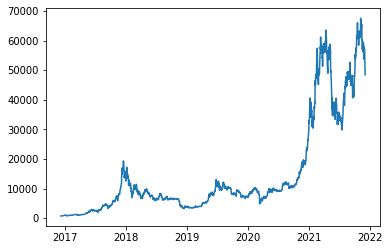

In [51]:
dtval = data[['종가']]
dtdate = pd.to_datetime(data.날짜)
plt.plot(dtdate, dtval)

In [52]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
sc_val= sc.fit_transform(dtval)
sc_val

array([[0.00000000e+00],
       [1.10828714e-04],
       [1.54261589e-04],
       ...,
       [7.91875656e-01],
       [7.25433842e-01],
       [7.13705468e-01]])

In [53]:
data_train = []
data_test = []
for i in range(0, 1200):
    data_train.append(sc_val[i])
for i in range(1200, 1826):
    data_test.append(sc_val[i])
data_train, data_test = np.array(data_train), np.array(data_test)

In [55]:
# Creating a data structure with 30 timesteps and 1 output
X_train = []
y_train = []
for i in range(30, 1200):
    X_train.append(sc_val[i-30:i])
    y_train.append(sc_val[i])
X_train, y_train = np.array(X_train), np.array(y_train)

In [56]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [57]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [58]:
# Initialising the RNN
regressor30 = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor30.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor30.add(Dropout(0.2))
regressor30.add(LSTM(units = 50, return_sequences = True))
regressor30.add(Dropout(0.2))
regressor30.add(LSTM(units = 50, return_sequences = True))
regressor30.add(Dropout(0.2))
regressor30.add(LSTM(units = 50))
regressor30.add(Dropout(0.2))

In [59]:
regressor30.add(Dense(units = 1))
regressor30.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor30.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
37/37 [==============================] - 9s 64ms/step - loss: 0.0017
Epoch 2/100
37/37 [==============================] - 2s 64ms/step - loss: 4.9882e-04
Epoch 3/100
37/37 [==============================] - 2s 65ms/step - loss: 4.2384e-04
Epoch 4/100
37/37 [==============================] - 2s 64ms/step - loss: 3.8020e-04
Epoch 5/100
37/37 [==============================] - 2s 64ms/step - loss: 3.2224e-04
Epoch 6/100
37/37 [==============================] - 2s 64ms/step - loss: 3.3622e-04
Epoch 7/100
37/37 [==============================] - 2s 65ms/step - loss: 3.2833e-04
Epoch 8/100
37/37 [==============================] - 2s 65ms/step - loss: 2.9233e-04
Epoch 9/100
37/37 [==============================] - 2s 65ms/step - loss: 2.6951e-04
Epoch 10/100
37/37 [==============================] - 2s 65ms/step - loss: 2.3902e-04
Epoch 11/100
37/37 [==============================] - 2s 64ms/step - loss: 2.4057e-04
Epoch 12/100
37/37 [==============================] - 2s 64ms/step 

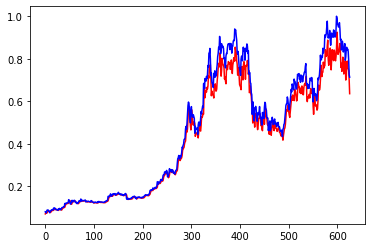

In [64]:
X_test30 = []
for i in range(1200, 1826):
    X_test30.append(sc_val[i-30:i])
X_test30 = np.array(X_test30)
X_test30 = np.reshape(X_test30, (X_test30.shape[0], X_test30.shape[1], 1))
final30 = regressor30.predict(X_test30)
plt.plot(final30, color = 'red')
plt.plot(data_test, color = 'blue')

In [63]:
X_train = []
y_train = []
for i in range(100, 1200):
    X_train.append(sc_val[i-100:i])
    y_train.append(sc_val[i])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [65]:
# Initialising the RNN
regressor100 = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor100.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor100.add(Dropout(0.2))
regressor100.add(LSTM(units = 50, return_sequences = True))
regressor100.add(Dropout(0.2))
regressor100.add(LSTM(units = 50, return_sequences = True))
regressor100.add(Dropout(0.2))
regressor100.add(LSTM(units = 50))
regressor100.add(Dropout(0.2))

In [66]:
regressor100.add(Dense(units = 1))
regressor100.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor100.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
35/35 [==============================] - 14s 197ms/step - loss: 0.0018
Epoch 2/100
35/35 [==============================] - 7s 198ms/step - loss: 5.0991e-04
Epoch 3/100
35/35 [==============================] - 7s 198ms/step - loss: 4.0986e-04
Epoch 4/100
35/35 [==============================] - 7s 200ms/step - loss: 3.6201e-04
Epoch 5/100
35/35 [==============================] - 7s 200ms/step - loss: 3.9425e-04
Epoch 6/100
35/35 [==============================] - 7s 196ms/step - loss: 3.4285e-04
Epoch 7/100
35/35 [==============================] - 7s 200ms/step - loss: 3.1719e-04
Epoch 8/100
35/35 [==============================] - 7s 199ms/step - loss: 2.8553e-04
Epoch 9/100
35/35 [==============================] - 7s 198ms/step - loss: 2.7273e-04
Epoch 10/100
35/35 [==============================] - 7s 198ms/step - loss: 2.7548e-04
Epoch 11/100
35/35 [==============================] - 7s 197ms/step - loss: 2.4266e-04
Epoch 12/100
35/35 [==============================] - 7

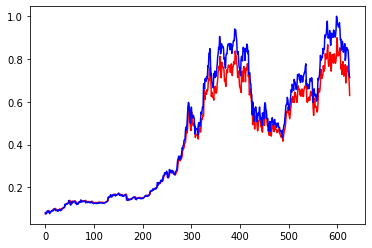

In [73]:
X_test100 = []
for i in range(1200, 1826):
    X_test100.append(sc_val[i-100:i])
X_test100 = np.array(X_test100)
X_test100 = np.reshape(X_test100, (X_test100.shape[0], X_test100.shape[1], 1))
final100 = regressor100.predict(X_test100)
final100.shape
plt.plot(final100, color = 'red')
plt.plot(data_test, color = 'blue')

In [74]:
regressor30.evaluate(X_test30, data_test)
regressor100.evaluate(X_test100, data_test)

20/20 [==============================] - 2s 45ms/step - loss: 0.0034


0.003363714087754488

In [75]:
X_train = []
y_train = []
for i in range(30, 1200):
    X_train.append(sc_val[i-30:i])
    y_train.append(sc_val[i])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [76]:
# Initialising the RNN
regressor30_2 = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor30_2.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor30_2.add(Dropout(0.3))
regressor30_2.add(LSTM(units = 100, return_sequences = True))
regressor30_2.add(Dropout(0.3))
regressor30_2.add(LSTM(units = 100, return_sequences = True))
regressor30_2.add(Dropout(0.3))
regressor30_2.add(LSTM(units = 100))
regressor30_2.add(Dropout(0.3))

In [77]:
regressor30_2.add(Dense(units = 1))
regressor30_2.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor30_2.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
37/37 [==============================] - 11s 108ms/step - loss: 0.0015
Epoch 2/100
37/37 [==============================] - 4s 108ms/step - loss: 4.6846e-04
Epoch 3/100
37/37 [==============================] - 4s 107ms/step - loss: 3.4869e-04
Epoch 4/100
37/37 [==============================] - 4s 107ms/step - loss: 3.1166e-04
Epoch 5/100
37/37 [==============================] - 4s 107ms/step - loss: 3.0562e-04
Epoch 6/100
37/37 [==============================] - 4s 108ms/step - loss: 3.1106e-04
Epoch 7/100
37/37 [==============================] - 4s 108ms/step - loss: 2.6620e-04
Epoch 8/100
37/37 [==============================] - 4s 107ms/step - loss: 2.3846e-04
Epoch 9/100
37/37 [==============================] - 4s 108ms/step - loss: 2.3751e-04
Epoch 10/100
37/37 [==============================] - 4s 108ms/step - loss: 2.1242e-04
Epoch 11/100
37/37 [==============================] - 4s 107ms/step - loss: 2.7068e-04
Epoch 12/100
37/37 [==============================] - 4

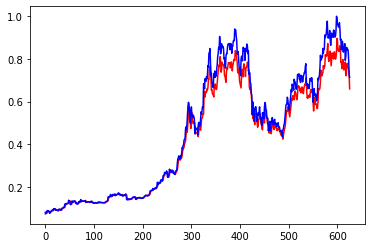

In [79]:
X_test30_2 = []
for i in range(1200, 1826):
    X_test30_2.append(sc_val[i-30:i])
X_test30_2 = np.array(X_test30_2)
X_test30_2 = np.reshape(X_test30_2, (X_test30_2.shape[0], X_test30_2.shape[1], 1))
final30_2 = regressor30_2.predict(X_test30_2)
final30_2.shape
plt.plot(final30_2, color = 'red')
plt.plot(data_test, color = 'blue')

In [80]:
regressor30.evaluate(X_test30, data_test)
regressor100.evaluate(X_test100, data_test)
regressor30_2.evaluate(X_test30_2, data_test)

20/20 [==============================] - 2s 32ms/step - loss: 0.0025


0.002544713206589222